In [26]:
import sqlite3
import pandas as pd
import traceback


#takeaway_db = '../databases/takeaway.db'
deliveroo_db = r"D:\BeCode\Excercise1\GNT-Arai-7\projects\07-delivery_market_analysis_with_SQL\databases\deliveroo.db"
#deliveroo_db ='../databases/ubereats.db'

def query_db(db, sql_query):
    ''' 
    input: 
        db (str): Path to SQLite database
        sql_query (str): SQL query to execute
    output: 
        pandas DataFrame containing query results
    '''
    try:
        # Connect to the SQLite database
        conn = sqlite3.connect(db)
        print('Connection Successful')

        # Execute the SQL query and fetch the results
        df = pd.read_sql_query(sql_query, conn)

        # Close the connection
        conn.close()

        # Return the query results as a pandas DataFrame
        return df

    except Exception as e:
        print('An error occurred:', e)
        traceback.print_exc()
        return None
    

sql_query = "SELECT *  FROM locations;"

result_df = query_db(deliveroo_db, sql_query)
if result_df is not None:
    print(result_df)






Connection Successful
        id                                     name  \
0        0                    Onze-Lieve-Vrouwekerk   
1        1  Sint-Petrusbanden en Sint-Berlindiskerk   
2        2                       Sint-Machariuskerk   
3        3                        Sint-Martinuskerk   
4        4                     Onze-Lieve-Vrouwkerk   
...    ...                                      ...   
2500  2500                                Het Marca   
2501  2501            Onze-Lieve-Vrouw ter Noodkerk   
2502  2502                        Sint-Ursmaruskerk   
2503  2503                     Onze-Lieve-Vrouwkerk   
2504  2504                       Sint-Gertrudiskerk   

                               postalcode   latitude  longitude  
0        b'\xb8$\x00\x00\x00\x00\x00\x00'  50.792164   4.052104  
1        b'\x94%\x00\x00\x00\x00\x00\x00'  50.872532   3.832819  
2        b'\x1c%\x00\x00\x00\x00\x00\x00'  50.775885   3.869852  
3        b'\xa0#\x00\x00\x00\x00\x00\x00'  51.213449 

Connection Successful


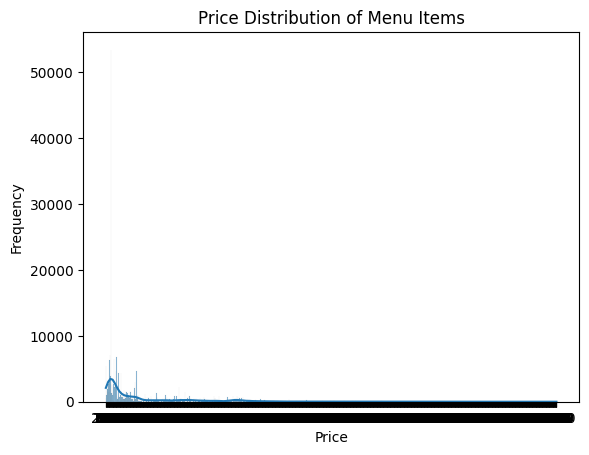

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns

sql_query = "SELECT price FROM menu_items;" 
price_data = query_db(deliveroo_db, sql_query)


if price_data is not None:
    # Plot the distribution
    sns.histplot(price_data['price'], bins=20, kde=True)
    plt.title("Price Distribution of Menu Items")
    plt.xlabel("Price")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No price data retrieved.")


Connection Successful
                 restaurant_name  average_price
0        Neuhaus Woluwe Shopping      32.310000
1                     Verso Café      23.891304
2                   De Superette      19.166667
3                   Blend Wines       14.442857
4                          Esaki      12.664365
5                           TIKA      12.321429
6                   Sette Piatti      11.026316
7            La Bagatelle de Lou       9.998913
8                        Neptune       8.418750
9                      Chin Chin       7.888889
10                 ACAI BAR GENT       6.741026
11                Fluffy Falafel       5.375000
12           That's Toast Brugge       5.201531
13      Cookiele Antwerp Cookies       5.155000
14            Yokubō - Meal Kits       4.720455
15                     The Shack       4.706000
16  Bar Buenos Aires - Empanadas       4.429412
17           The Lab Social Club       4.234568
18              The Kind Coconut       3.307692
19                

C:\Users\kesav\AppData\Local\Temp\ipykernel_29776\2760877297.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


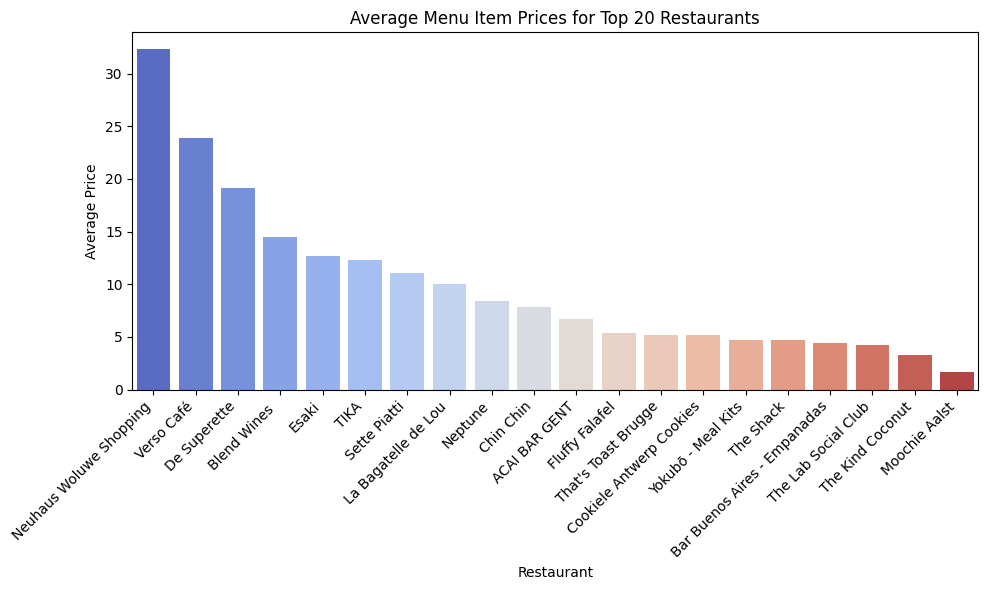

In [38]:
sql_query = """
WITH TopRestaurants AS (
    SELECT 
        id AS restaurant_id,
        name AS restaurant_name,
        rating
    FROM 
        restaurants
    ORDER BY 
        rating DESC
    LIMIT 20
)
SELECT 
    tr.restaurant_name,
    AVG(mi.price) AS average_price
FROM 
    TopRestaurants tr
JOIN 
    menu_items mi ON mi.restaurant_id = tr.restaurant_id
GROUP BY 
    tr.restaurant_name
ORDER BY 
    average_price DESC;
"""

# Fetch and display the data
average_prices = query_db(deliveroo_db, sql_query)

if average_prices is not None and not average_prices.empty:
    print(average_prices)

    # Plot the bar chart for average prices
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=average_prices,
        x="restaurant_name",
        y="average_price",
        palette="coolwarm"
    )
    plt.title("Average Menu Item Prices for Top 20 Restaurants")
    plt.xlabel("Restaurant")
    plt.ylabel("Average Price")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No data found for average prices.")


Connection Successful
                               location_name  restaurant_count
0                         Sint-Dominicuskerk               821
1     Kapel van het Allerheiligste Sacrament               805
2                          Heilige Geestkerk               805
3            Onze-Lieve-Vrouw-ter-Sneeuwkerk               797
4      Heilige Familie en Sint-Corneliuskerk               789
...                                      ...               ...
1423                     Sint-Corneliuskapel                 1
1424                        Sint-Pieterskerk                 1
1425                                       0                 1
1426                    Residentie t Convent                 1
1427     Sint-Dionysius en Sint-Genesiuskerk                 1

[1428 rows x 2 columns]


C:\Users\kesav\AppData\Local\Temp\ipykernel_29776\1387537379.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


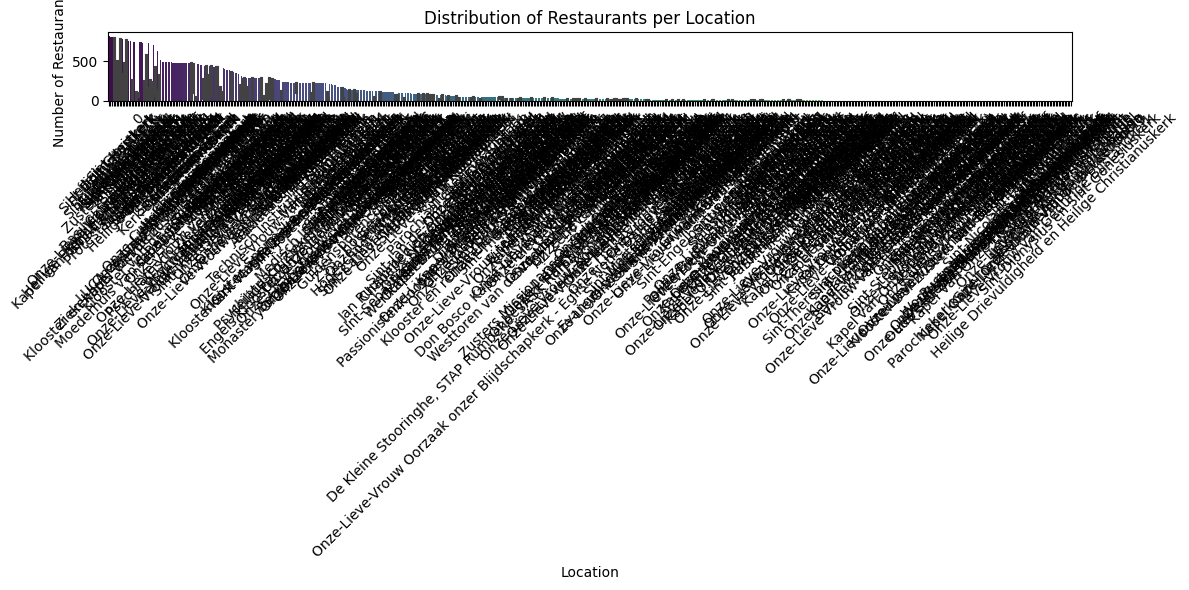

In [29]:
sql_query = """
SELECT 
    l.name AS location_name,
    COUNT(ltr.restaurant_id) AS restaurant_count
FROM 
    locations l
JOIN 
    locations_to_restaurants ltr ON l.id = ltr.location_id
GROUP BY 
    l.id, l.name
ORDER BY 
    restaurant_count DESC;
"""

# Load the data
restaurant_distribution = query_db(deliveroo_db, sql_query)

if restaurant_distribution is not None and not restaurant_distribution.empty:
    print(restaurant_distribution)

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=restaurant_distribution,
        x="location_name",
        y="restaurant_count",
        palette="viridis"
    )
    plt.title("Distribution of Restaurants per Location")
    plt.xlabel("Location")
    plt.ylabel("Number of Restaurants")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data found for restaurant distribution.")


In [ ]:
sql_query = """
SELECT 
    name, 
    rating, 
    address, 
    phonenumber 
FROM 
    restaurants 
WHERE 
    category = 'Pizza' 
ORDER BY 
    rating DESC 
LIMIT 10;
"""

top_pizza_restaurants = query_db(deliveroo_db, sql_query)

if top_pizza_restaurants is not None:
    print("Top 10 Pizza Restaurants by Rating:")
    print(top_pizza_restaurants)
else:
    print("Failed to retrieve data.")

Connection Successful
Top 10 Pizza Restaurants by Rating:
                    name  rating                      address   phonenumber
0           La Barchetta     4.6                Kerkstraat 92   +3227721755
1                 Sforno     4.6                  Sasplein 11   +3250692682
2                Luigi's     4.6    51d Michel de Braeystraat  +32499525588
3          Tutti Atelier     4.5          Place des Maïeurs 8   +3227624033
4           That's Amore     4.5     Lombaardstraat 14, bus 2  +32485208313
5                 Kalura     4.5             Prinsesstraat 38   +3232948453
6  Piano A apulian pizza     4.5               Ravenstraat 38   +3216435836
7     Da Mario Take Away     4.4           Rue Victor Hugo 10  +32485668999
8         PIZZERIA ROSSI     4.4   Groenplein 2a,3500 Hasselt   +3211284500
9    Chanchal restaurant     4.3  Avenue Houba de Strooper 11   +3224781700


C:\Users\kesav\AppData\Local\Temp\ipykernel_29776\2393543358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


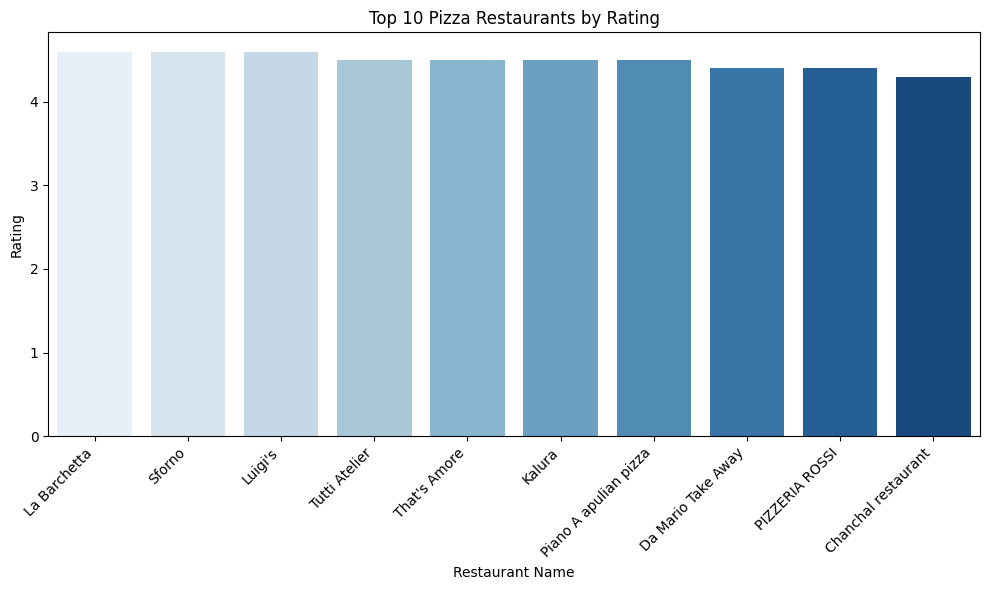

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame is not empty
if not top_pizza_restaurants.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_pizza_restaurants,
        x="name",
        y="rating",
        palette="Blues"
    )
    plt.title("Top 10 Pizza Restaurants by Rating")
    plt.xlabel("Restaurant Name")
    plt.ylabel("Rating")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


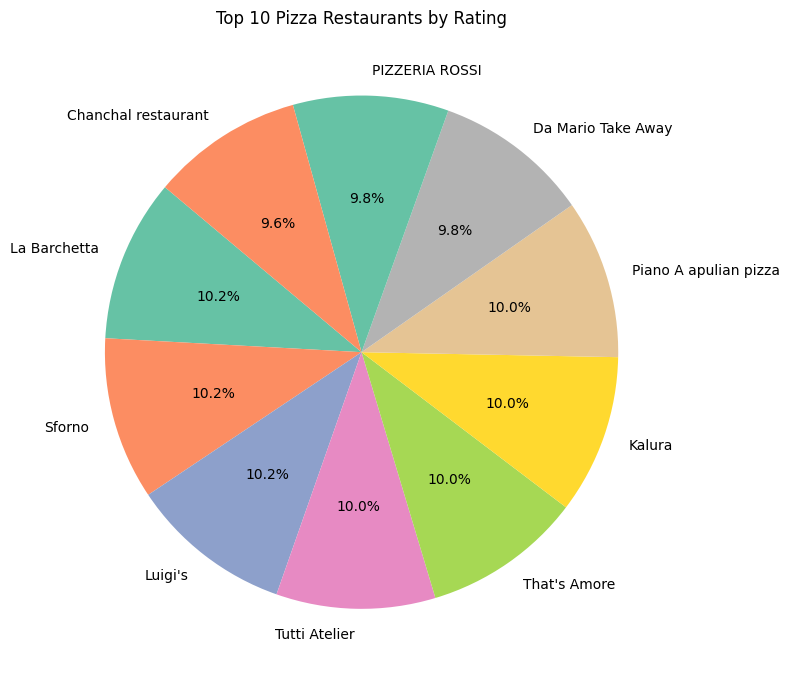

In [ ]:
import matplotlib.pyplot as plt

# Ensure the DataFrame is not empty
if not top_pizza_restaurants.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(
        top_pizza_restaurants["rating"], 
        labels=top_pizza_restaurants["name"], 
        autopct="%1.1f%%", 
        startangle=140, 
        colors=sns.color_palette("Set2", len(top_pizza_restaurants))
    )
    plt.title("Top 10 Pizza Restaurants by Rating")
    plt.tight_layout()
    plt.show()
else:
    print("The dataset is empty. Cannot create a pie chart.")


In [ ]:
import folium

sql_query = """
SELECT 
    l.name AS location_name, 
    l.latitude, 
    l.longitude, 
    AVG(mi.price) AS avg_kapsalon_price
FROM 
    menu_items mi
JOIN 
    restaurants r ON mi.restaurant_id = r.id
JOIN 
    locations_to_restaurants ltr ON r.id = ltr.restaurant_id
JOIN 
    locations l ON l.id = ltr.location_id
WHERE 
    LOWER(mi.name) = 'kapsalon'
GROUP BY 
    l.id, l.name, l.latitude, l.longitude;
"""

kapsalon_data = query_db(deliveroo_db, sql_query)

# Map the locations
if kapsalon_data is not None and not kapsalon_data.empty:
    # Initialize a map centered around the first location
    m = folium.Map(location=[kapsalon_data['latitude'].mean(), kapsalon_data['longitude'].mean()], zoom_start=12)

    # Add markers for each location
    for _, row in kapsalon_data.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"{row['location_name']} - Avg Price: €{row['avg_kapsalon_price']:.2f}",
            tooltip=row['location_name']
        ).add_to(m)

    # Save the map as an HTML file and display
    m.save("kapsalon_locations_map.html")
    print("Map saved as kapsalon_locations_map.html")
else:
    print("No kapsalon data found.")

Connection Successful
Map saved as kapsalon_locations_map.html


Connection Successful
                           location_name  avg_price  kapsalon_count
0        Onze-Lieve-Vrouw-ter-Sneeuwkerk   9.018981             206
1  Heilige Familie en Sint-Corneliuskerk   9.067387             199
2                  Sint-Willibrorduskerk   8.900051             197
3                     Sint-Norbertuskerk   9.083298             191
4                          Sint-Janskerk   9.056436             188
5                      Heilige Geestkerk   8.737204             186
6                        Heilig-Hartkerk   8.907278             180
7           Basiliek van het Heilig Hart   8.660278             180
8                          Sint-Annakerk   8.927430             179
9                     Sint-Dominicuskerk   8.926313             179


C:\Users\kesav\AppData\Local\Temp\ipykernel_29776\2821395824.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


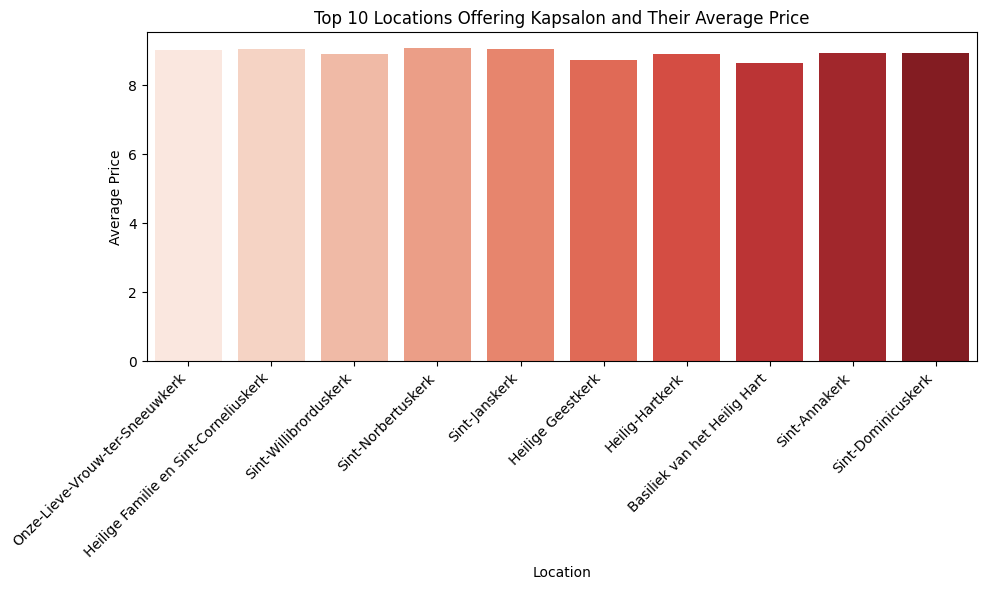

In [37]:
sql_query = """
SELECT 
    l.name AS location_name,
    AVG(mi.price) AS avg_price,
    COUNT(mi.id) AS kapsalon_count
FROM 
    locations l
JOIN 
    locations_to_restaurants ltr ON l.id = ltr.location_id
JOIN 
    restaurants r ON r.id = ltr.restaurant_id
JOIN 
    menu_items mi ON mi.restaurant_id = r.id
WHERE 
    mi.name LIKE '%kapsalon%'  -- Assuming the dish name contains "kapsalon"
GROUP BY 
    l.id, l.name
ORDER BY 
    kapsalon_count DESC  -- Or ORDER BY avg_price DESC to focus on top by price
LIMIT 10;
"""

# Fetch data
top_kapsalon_locations = query_db(deliveroo_db, sql_query)

if top_kapsalon_locations is not None and not top_kapsalon_locations.empty:
    print(top_kapsalon_locations)

    # Plot the data using a bar plot for average price
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_kapsalon_locations,
        x="location_name",
        y="avg_price",
        palette="Reds"
    )
    plt.title("Top 10 Locations Offering Kapsalon and Their Average Price")
    plt.xlabel("Location")
    plt.ylabel("Average Price")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No data found for top 10 locations offering Kapsalon.")


In [ ]:
sql_query = """
SELECT 
    l.name AS location_name,
    r.uname AS platform,
    AVG(r.delivery_fee) AS avg_delivery_fee,
    MIN(r.delivery_fee) AS min_delivery_fee,
    MAX(r.delivery_fee) AS max_delivery_fee
FROM 
    restaurants r
JOIN 
    locations_to_restaurants ltr ON r.id = ltr.restaurant_id
JOIN 
    locations l ON l.id = ltr.location_id
WHERE 
    r.delivery_fee IS NOT NULL
GROUP BY 
    l.name, r.uname
ORDER BY 
    l.name, r.uname;
"""

# Load the data
delivery_fee_data = query_db(deliveroo_db, sql_query)

if delivery_fee_data is not None and not delivery_fee_data.empty:
    print(delivery_fee_data)

 

Connection Successful
             location_name                        platform  avg_delivery_fee  \
0                        0                         18sushi              4.99   
1                        0                            1985              4.99   
2                        0  40-moeders-belgian-street-food              4.99   
3                        0                         5th-gok              4.99   
4                        0                    5th-gok-gent              4.99   
...                    ...                             ...               ...   
71434  klooster OLV Fatima                      vesper-kor              4.99   
71435  klooster OLV Fatima          vief-healthy-fast-food              4.99   
71436  klooster OLV Fatima                      wow-salads              4.99   
71437  klooster OLV Fatima                 youwok-courtrai              4.99   
71438  klooster OLV Fatima                  zakkan-zakaria              4.99   

      min_deliver

Connection Successful
                     restaurant_name                address  rating  \
0            Pizza House - Fast Food         Grote Markt 35     4.3   
1  Bakkerij Aernoudt - Groentenmarkt            1 Kortemunt     4.4   
2        Bakkerij Aernoudt - Gent UZ         1 De Pintelaan     4.3   
3     Bakkerij Aernoudt - Gentbrugge      Dulle-Grietlaan 9     4.4   
4                       Bubble Land        Smedenstraat, 10     4.2   
5                    Luxalad Antwerp      Oude Koornmarkt 6     4.4   
6                      Café Pistolet  Oude Kortrijkstraat 4     4.6   
7                Five Guys Antwerpen        11 De Keyserlei     4.2   
8                         #Kitchens   rue saint lambert 41,     4.3   
9                             Dunkin               Meir 117     4.5   

   avg_price  price_to_rating_ratio  
0   0.000000               0.000000  
1   0.000000               0.000000  
2   0.000000               0.000000  
3   0.000000               0.000000  
4   0.

C:\Users\kesav\AppData\Local\Temp\ipykernel_16136\3940561807.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


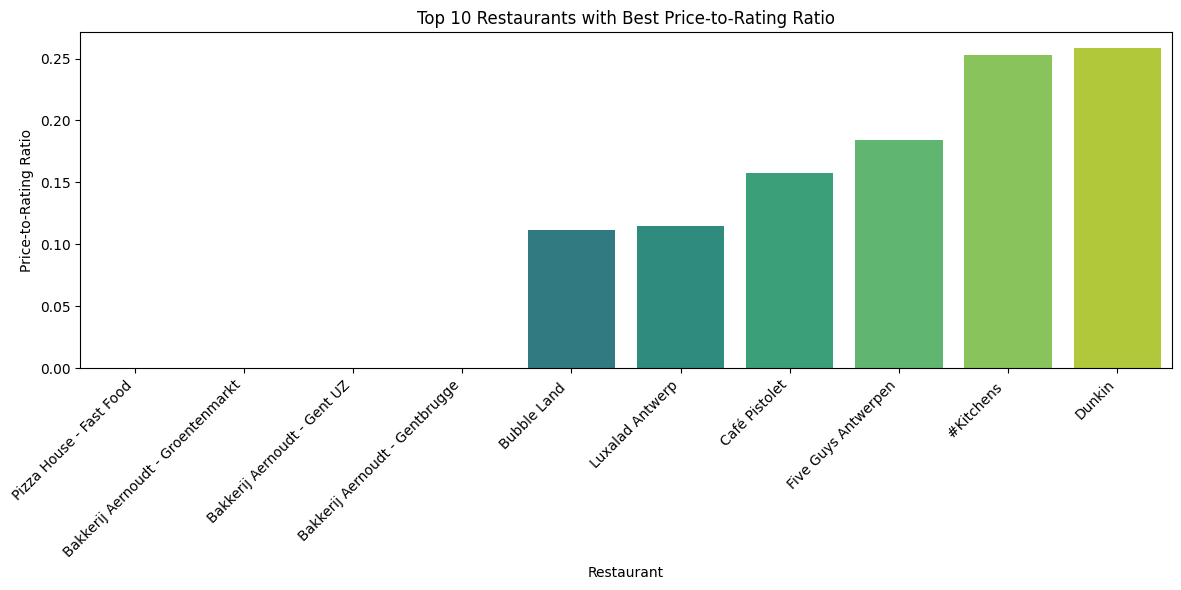

In [ ]:
sql_query = """
SELECT 
    r.name AS restaurant_name,
    r.address,
    r.rating,
    AVG(mi.price) AS avg_price,
    (AVG(mi.price) / r.rating) AS price_to_rating_ratio
FROM 
    restaurants r
JOIN 
    menu_items mi ON r.id = mi.restaurant_id
WHERE 
    r.rating IS NOT NULL AND r.rating >= 3
GROUP BY 
    r.id, r.name, r.address, r.rating
ORDER BY 
    price_to_rating_ratio ASC
LIMIT 10;
"""

# Load the data
price_to_rating_data = query_db(deliveroo_db, sql_query)

if price_to_rating_data is not None and not price_to_rating_data.empty:
    print(price_to_rating_data)

    # Plot the data
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=price_to_rating_data,
        x="restaurant_name",
        y="price_to_rating_ratio",
        palette="viridis"
    )
    plt.title("Top 10 Restaurants with Best Price-to-Rating Ratio")
    plt.xlabel("Restaurant")
    plt.ylabel("Price-to-Rating Ratio")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No data found for price-to-rating ratio.")


In [31]:
sql_query = """

SELECT name FROM categories
JOIN menu_items ON menu_items.name = restaurants.name
WHERE menu_items.name LIKE '%Vegen%'
   OR menu_items.name LIKE '%Vegetarisch%' 
   OR menu_items.name LIKE '%Veggie%'
GROUP BY restaurants.category
ORDER BY availability_count DESC;

"""



# Fetch data
top_cities_veg_veg = query_db(deliveroo_db, sql_query)

if top_cities_veg_veg is not None and not top_cities_veg_veg.empty:
    print(top_cities_veg_veg)

    # Melt the data for easier plotting
    melted_data = top_cities_veg_veg.melt(
        id_vars=["location_name"],
        value_vars=["vegetarian_count", "vegan_count"],
        var_name="Dish Type",
        value_name="Count"
    )

    # Plot the data using a bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(
        data=melted_data,
        x="location_name",
        y="Count",
        hue="Dish Type",
        palette="Set2"
    )
    plt.title("Top 10 Cities with Vegetarian and Vegan Dishes Availability")
    plt.xlabel("Location")
    plt.ylabel("Number of Dishes")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("No data found for top cities with vegetarian and vegan dishes.")


Connection Successful
An error occurred: Execution failed on sql '

SELECT name FROM categories
JOIN menu_items ON menu_items.name = restaurants.name
WHERE menu_items.name LIKE '%Vegen%'
   OR menu_items.name LIKE '%Vegetarisch%' 
   OR menu_items.name LIKE '%Veggie%'
GROUP BY restaurants.category
ORDER BY availability_count DESC;

': ambiguous column name: name
No data found for top cities with vegetarian and vegan dishes.


Traceback (most recent call last):
  File "d:\BeCode\Projects\delivery-market-analysis-with-SQL\marketanalysis\lib\site-packages\pandas\io\sql.py", line 2674, in execute
    cur.execute(sql, *args)
sqlite3.OperationalError: ambiguous column name: name

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\kesav\AppData\Local\Temp\ipykernel_29776\2178259895.py", line 24, in query_db
    df = pd.read_sql_query(sql_query, conn)
  File "d:\BeCode\Projects\delivery-market-analysis-with-SQL\marketanalysis\lib\site-packages\pandas\io\sql.py", line 526, in read_sql_query
    return pandas_sql.read_query(
  File "d:\BeCode\Projects\delivery-market-analysis-with-SQL\marketanalysis\lib\site-packages\pandas\io\sql.py", line 2738, in read_query
    cursor = self.execute(sql, params)
  File "d:\BeCode\Projects\delivery-market-analysis-with-SQL\marketanalysis\lib\site-packages\pandas\io\sql.py", line 2686, in execute
    raise ex fro